In [1]:
import numpy as np
import pymc as pm

In [2]:
param = pm.Exponential("poisson_param", 1)
incrParam = param + 1

In [3]:
incrParam.parents

{'a': <pymc.distributions.new_dist_class.<locals>.new_class 'poisson_param' at 0x00000009F93E4668>,
 'b': 1}

In [4]:
incrParam.value

1.5246951686776484

In [9]:
param.random()

array(0.2435270339224634)

In [10]:
some_variable = pm.DiscreteUniform("discrete_uni_var", 0, 4)

In [15]:
some_variable.random()

array(2)

In [17]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(12.5, 4)

In [19]:
lambda_ = pm.Exponential("lambda", 1)

(array([ 0.95008584,  1.07758654,  1.05702191,  0.97065047,  0.93363414,
         0.90484366,  0.92540829,  0.92952122,  0.96653755,  0.91718244,
         0.82669807,  0.86782733,  0.92952122,  0.97887633,  0.9583117 ,
         0.8143593 ,  0.80202052,  0.8143593 ,  0.85960148,  0.82258515,
         0.76911711,  0.81024637,  0.71153615,  0.73210078,  0.72387493,
         0.71153615,  0.73621371,  0.67863275,  0.62105179,  0.719762  ,
         0.72798786,  0.74032663,  0.62105179,  0.71564908,  0.67863275,
         0.64161641,  0.67040689,  0.56758375,  0.52645449,  0.56347083,
         0.7033103 ,  0.55113205,  0.56347083,  0.59226131,  0.5429062 ,
         0.50177694,  0.59637423,  0.52234157,  0.52234157,  0.55113205,
         0.5758096 ,  0.58403545,  0.53056742,  0.54701912,  0.44830891,
         0.48943816,  0.5758096 ,  0.50177694,  0.56758375,  0.47709939,
         0.47298646,  0.49355109,  0.55524497,  0.52234157,  0.49355109,
         0.46476061,  0.45242183,  0.42363135,  0.3

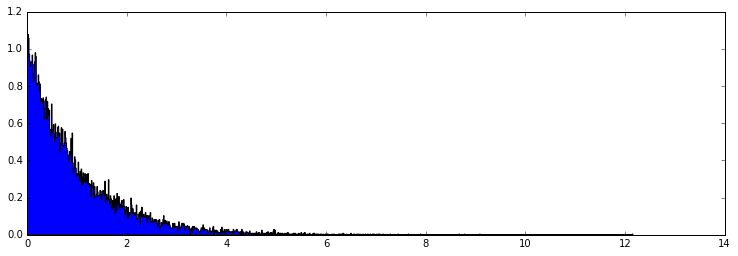

In [22]:
samples = [lambda_.random() for i in range(20000)]
plt.hist(samples, bins = 1000, normed = True, histtype='stepfilled')

In [23]:
p_true_hidden = 0.45
N = 1000

occurences = pm.rbernoulli(p_true_hidden, N)
print(occurences.sum())

443


<Container object of 1000 artists>

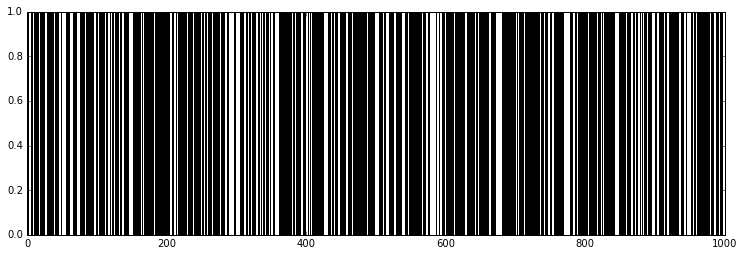

In [26]:
plt.bar(range(len(occurences)), occurences)

In [29]:
#Set prior
p = pm.Uniform('p', lower = 0, upper = 1)

observation = pm.Bernoulli("Obs", p, value = occurences, observed = True)

In [30]:
mcmc = pm.MCMC([p,observation])

In [31]:
mcmc.sample(18000, 1000)

 [-----------------100%-----------------] 18000 of 18000 complete in 1.1 sec

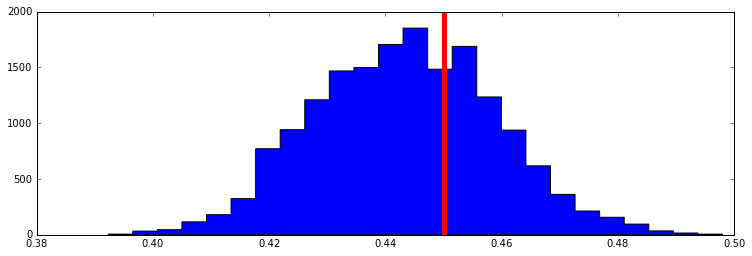

In [39]:
plt.hist(mcmc.trace("p")[:], bins = 25, histtype = "stepfilled")
plt.vlines(p_true_hidden, 0, 2000, lw = 5, color = "red")

In [36]:
mcmc.trace("p")[:]

array([ 0.43246006,  0.43246006,  0.43246006, ...,  0.43683479,
        0.43683479,  0.44567172])

In [37]:
mcmc.trace("p")[:].mean()

0.44338834395696475